In [2]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier as xgb

In [3]:
%store -r X_train_bearish
%store -r X_test_bearish
%store -r X_train_bullish
%store -r X_test_bullish
%store -r Y_train_bearish
%store -r Y_test_bearish
%store -r Y_train_bullish
%store -r Y_test_bullish

%store -r trades_bearish
%store -r trades_bullish

In [4]:
Y_test_bearish

64547    1
64548    0
64561    0
64574    1
64611    1
        ..
80499    0
80544    1
80552    0
80591    1
80592    1
Name: result, Length: 1059, dtype: int64

**`Random Forest Classifier`**

In [10]:
# random forest classifer for bearish trades
# rfc = RandomForestClassifier(random_state=1516,min_samples_split=5)
# grid_param = {
#     'n_estimators':[50,100,200,250,500],
#     'criterion': ['gini', 'entropy'],
#     'bootstrap': [True, False],
#     'max_depth':[3,5,6,10,20]
# }
# gd_sr = GridSearchCV(estimator=rfc,
#                      param_grid=grid_param,
#                      scoring=None,
#                      cv=5,
#                      n_jobs=-1)



In [20]:
#fit random forest classifier for bearish trades then predict results
# gd_sr.fit(X_train_bearish, Y_train_bearish)
# best_parameters = gd_sr.best_params_
# print(best_parameters)


In [189]:
#fit random forest classifier for bearish trades then predict results
rfc_bearish = RandomForestClassifier(criterion='gini',n_estimators=100,random_state=1516,min_samples_split=2,bootstrap=False)
rfc_bearish.fit(X_train_bearish, Y_train_bearish)
y_pred_bearish_rfc = rfc_bearish.predict( X_test_bearish)

              precision    recall  f1-score   support

           0       0.42      0.24      0.31       377
           1       0.66      0.81      0.73       682

    accuracy                           0.61      1059
   macro avg       0.54      0.53      0.52      1059
weighted avg       0.57      0.61      0.58      1059



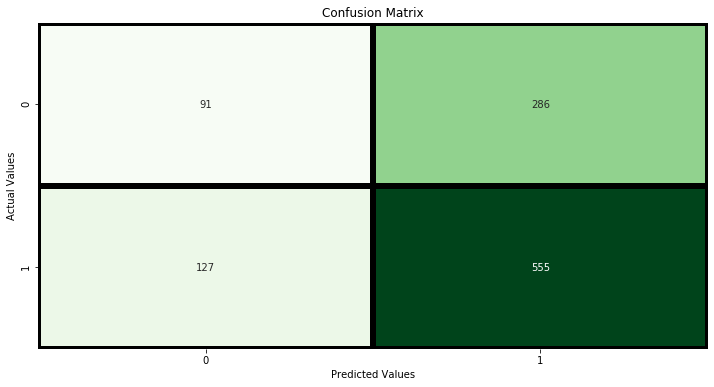

In [190]:
# Evalute performance using confusion matrix bearish
cm=confusion_matrix(Y_test_bearish,y_pred_bearish_rfc)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Greens',linewidths=5,linecolor='black', cbar=False)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

print(classification_report(Y_test_bearish, y_pred_bearish_rfc)) 

Text(0.5, 0, 'Permutation Importance')

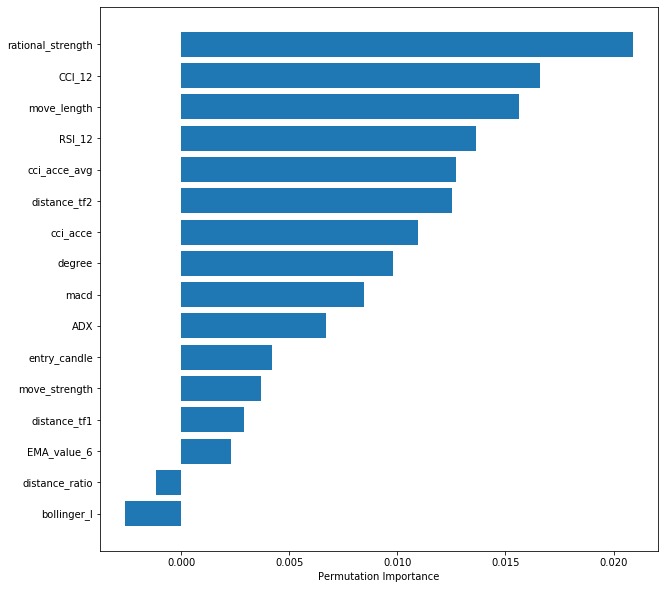

In [191]:
fig = plt.figure(figsize=(10,10))

perm_importance = permutation_importance(rfc_bearish, X_test_bearish, Y_test_bearish,n_repeats=100,random_state=0)
feature_names =  trades_bearish.drop('result',axis=1).columns
features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance",)

In [192]:
#fit random forest classifier for bullish trades then predict results
rfc_bullish = RandomForestClassifier(criterion='gini',n_estimators=100,random_state=1516,min_samples_split=2,bootstrap=False)
rfc_bullish.fit(X_train_bullish, Y_train_bullish)
y_pred_bullish_rfc = rfc_bullish.predict( X_test_bullish)

              precision    recall  f1-score   support

           0       0.45      0.22      0.30       385
           1       0.64      0.84      0.73       637

    accuracy                           0.61      1022
   macro avg       0.55      0.53      0.51      1022
weighted avg       0.57      0.61      0.56      1022



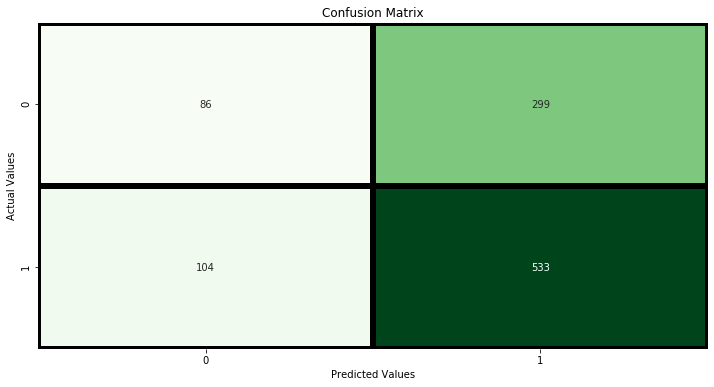

In [193]:
# Evalute performance using confusion matrix bullsih
cm=confusion_matrix(Y_test_bullish,y_pred_bullish_rfc)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Greens',linewidths=5,linecolor='black', cbar=False)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

print(classification_report(Y_test_bullish, y_pred_bullish_rfc)) 


Text(0.5, 0, 'Permutation Importance')

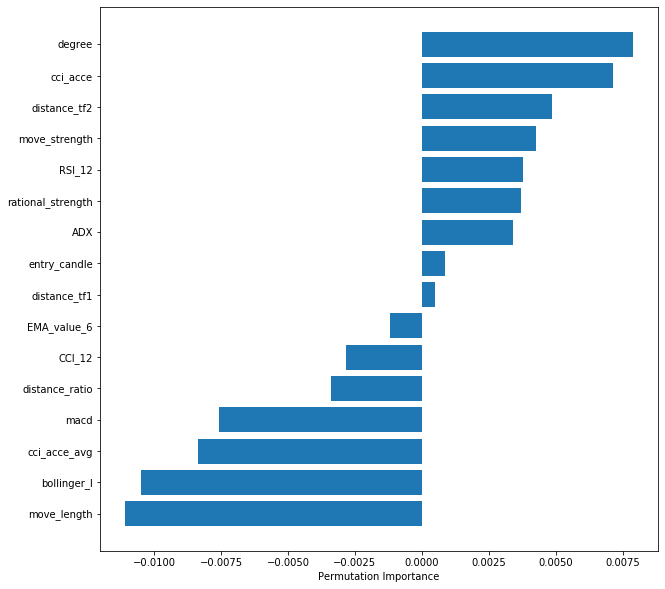

In [194]:
fig = plt.figure(figsize=(10,10))

perm_importance = permutation_importance(rfc_bullish, X_test_bearish, Y_test_bearish,n_repeats=100,random_state=0)
feature_names =  trades_bearish.drop('result',axis=1).columns
features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance",)

**`SVM Classifier`**

In [195]:
#fit SVM classifier for bearish trades then predict results
BearishSVM =  svm.SVC(C=100,gamma='scale',kernel='rbf')
BearishSVM.fit(X_train_bearish, Y_train_bearish)
y_pred_bearish_svm = BearishSVM.predict( X_test_bearish)

              precision    recall  f1-score   support

           0       0.39      0.31      0.34       377
           1       0.66      0.73      0.69       682

    accuracy                           0.58      1059
   macro avg       0.52      0.52      0.52      1059
weighted avg       0.56      0.58      0.57      1059



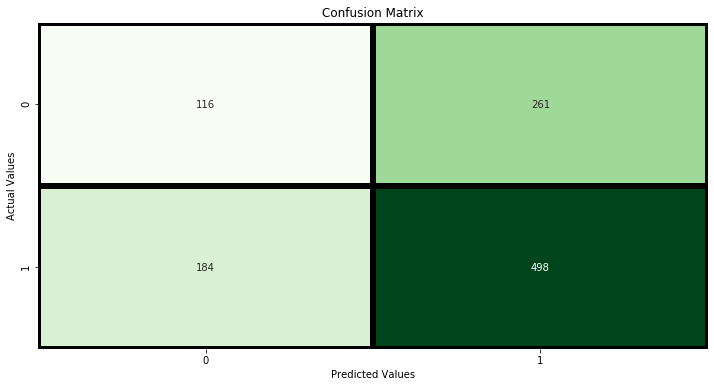

In [196]:
# Evalute performance using confusion matrix bearish
cm=confusion_matrix(Y_test_bearish,y_pred_bearish_svm)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Greens',linewidths=5,linecolor='black', cbar=False)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

print(classification_report(Y_test_bearish, y_pred_bearish_svm)) 

In [187]:
# feature importance
# fig = plt.figure(figsize=(10,10))

# perm_importance = permutation_importance(BearishSVM, X_test_bearish, Y_test_bearish,n_repeats=100,random_state=0)
# feature_names =  trades_bearish.drop('result',axis=1).columns
# features = np.array(feature_names)
# sorted_idx = perm_importance.importances_mean.argsort()
# plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
# plt.xlabel("Permutation Importance",)

In [197]:
#fit SVM classifier for bullish trades then predict results
BullishSVM =  svm.SVC(C=100,gamma='scale',kernel='rbf')
BullishSVM.fit(X_train_bullish, Y_train_bullish)
y_pred_bullish_svm = BullishSVM.predict( X_test_bullish)

              precision    recall  f1-score   support

           0       0.42      0.35      0.38       385
           1       0.64      0.71      0.67       637

    accuracy                           0.57      1022
   macro avg       0.53      0.53      0.53      1022
weighted avg       0.56      0.57      0.56      1022



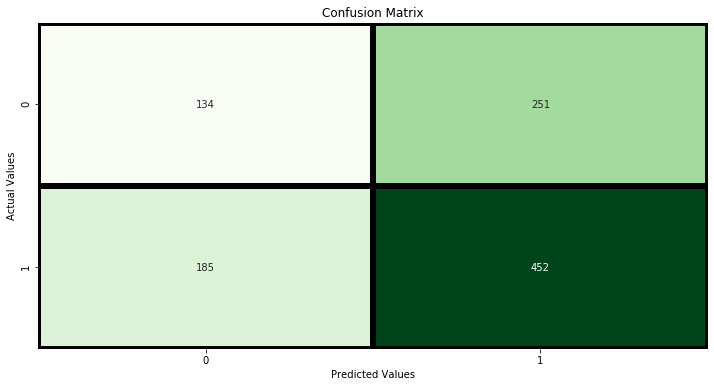

In [198]:
# Evalute performance using confusion matrix bullish
cm=confusion_matrix(Y_test_bullish,y_pred_bullish_svm)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Greens',linewidths=5,linecolor='black', cbar=False)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

print(classification_report(Y_test_bullish, y_pred_bullish_svm)) 

Text(0.5, 0, 'Permutation Importance')

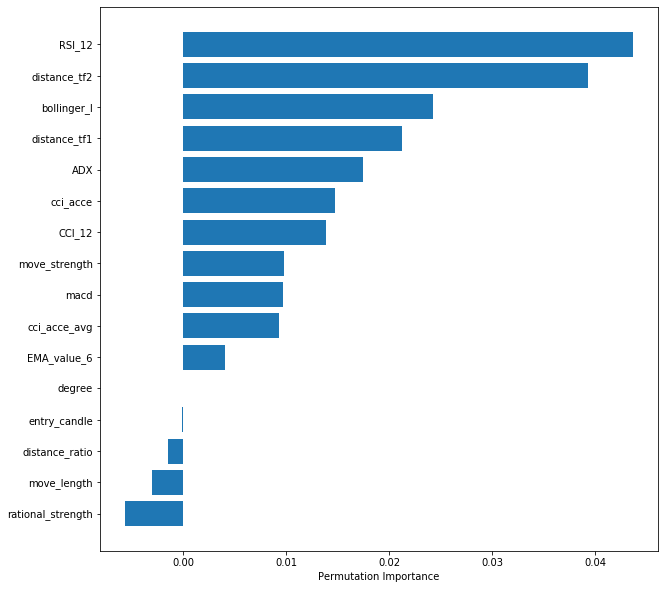

In [199]:
fig = plt.figure(figsize=(10,10))

perm_importance = permutation_importance(BullishSVM, X_test_bullish, Y_test_bullish,n_repeats=100,random_state=0)
feature_names =  trades_bullish.drop('result',axis=1).columns
features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance",)

**`XgBoost Classifier`**

In [200]:
xgbc_bearish = xgb(loss='exponential', n_estimators=1000, learning_rate=0.01, max_depth = 3, random_state=1516)

In [201]:
xgbc_bearish.fit(X_train_bearish, Y_train_bearish)
y_pred_bearish_xgb = xgbc_bearish.predict(X_test_bearish)


              precision    recall  f1-score   support

           0       0.46      0.13      0.20       377
           1       0.66      0.91      0.76       682

    accuracy                           0.64      1059
   macro avg       0.56      0.52      0.48      1059
weighted avg       0.59      0.64      0.56      1059



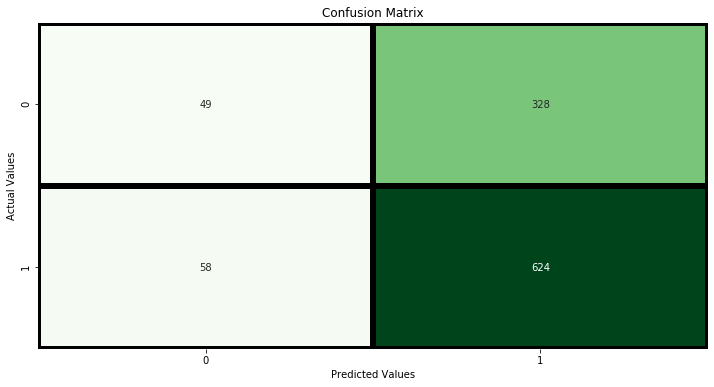

In [202]:
cm=confusion_matrix(Y_test_bearish,y_pred_bearish_xgb)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Greens',linewidths=5,linecolor='black', cbar=False)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

print(classification_report(Y_test_bearish, y_pred_bearish_xgb)) 